# Evaluación del Curso Métodos Numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño

2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Problema 1: Ecuaciones de Una Variable

### Planteamiento

La reacción de desoxidación simple de una acero con aluminio se expresa:

$$\mathrm{(Al_2O_3) = 2 [Al] + 3 [O]}$$

$$K_{\mathrm{Al}} = \frac{a_{\mathrm{Al}}^{2} \, a_{\mathrm{O}}^{3}}{a_{\mathrm{Al_2O_3}}}$$

La relación entre constante de equilibrio y temperatura está dada por:

$$\log K_{\mathrm{Al}} = 2 \log a_{\mathrm{Al}} + 3 \log a_{\mathrm{O}} - \log a_{\mathrm{Al_2O_3}}$$

$$\log K_{\mathrm{Al}} = - \frac{64000}{T} + 20.57$$

Bajo condiciones de temperatura de $T=1873$ $[\mathrm{K}]$, y de actividad de aluminio, $a_{\mathrm{Al}}=0.03$ $[\mathrm{wt\%}]$, y considerando que el producto de desoxidación es alumina pura, $a_{\mathrm{Al_2O_3}}=1$; encuentre la actividad de oxígeno al equilibrio, $a_{\mathrm{O}}$ $[\mathrm{wt\%}]$.

**Utilice el Método de Bisección y el Método de Newton Raphson para encontrar el valor de oxígeno al equilibrio, i.e., la raíz de la ecuación que resulta al combinar las expresiones de constante de equilibrio dadas arriba.**


#### Información adicional

Las expresiones para la constante de equilibrio se combinan para obtener la función para la cuál se debe buscar la raíz.

$$f_1(a_{\mathrm{O}})=- \frac{64000}{T} + 20.57 - 2 \log a_{\mathrm{Al}} - 3 \log a_{\mathrm{O}} + \log a_{\mathrm{Al_2O_3}}$$

La derivada de la función es:

$$f_1^{\prime}(a_{\mathrm{O}}) = - \frac{3}{\log 10 } \frac{1}{a_{\mathrm{O}}}$$

In [4]:
def f1(aO, aAl, aAl2O3, T):
    logK = -64000/T + 20.57
    logaAl = np.log10(aAl)
    logaO = np.log10(aO)
    logaAl2O3 = np.log10(aAl2O3)
    return logK - 2*logaAl - 3*logaO + logaAl2O3

In [5]:
# derivada de la función
def fp1(aO, aAl, aAl2O3, T):
    return -3 / (np.log(10) * aO)

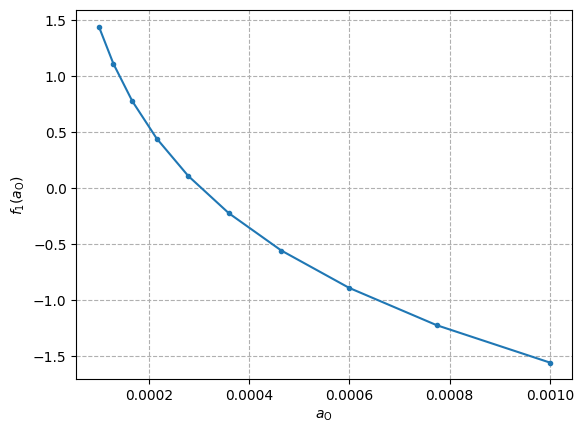

In [6]:
fig, ax = plt.subplots()

# variable, y parámetros
aO = np.logspace(-4, -3, 10)
aAl = 0.03
aAl2O3 = 1
T = 1873

ax.plot(aO, f1(aO, aAl, aAl2O3, T), marker='.')
ax.set(
    xlabel=r"$a_{\mathrm{O}}$",
    ylabel=r"$f_{1}(a_{\mathrm{O}})$"
)
ax.grid(ls='--')
plt.show()

### Respuesta

In [7]:
from scipy.optimize import bisect, newton

## Problema 2: Ecuaciones Algebráicas Simultaneas

### Planteamiento

Un circuito de flotación para concentración de minerales que opera en régimen estacionario, está compuesto de dos celdas principales (Celda 1, Celda 2) y una celda de reciclado (Celda R), como se muestra en el esquema debajo.

- La ***Celda 1*** es una ***Celda de Flotación Primaria***, que se alimenta con la pulpa proveniente de otro proceso previo ($F_{\mathrm{in}}$). En esta celda se produce un Concentrado ($F_{C_1}$) y un Efluente ($F_{T_1}$).

- La ***Celda 2*** es una ***Celda de Primera Limpia***, que se alimenta con los concentrados proveniente de la ***Celda de Flotación Primaria*** ($F_{C_1}$) y de la ***Celda de Agotamiento*** ($F_{C_R}$). En esta celda se produce un Concentrado ($F_{C_2}$) y un Efluente ($F_{T_2}$). El concentrado de esta celda es el concentrado final del proceso, y se envía a otros procesos posteriores.

- La ***Celda R*** es una ***Celda de Agotamiento***, que se alimenta con los efluentes provenientes de la ***Celda de Primera Limpia***. En esta celda se produce un Concentrado ($F_{C_R}$) y un Efluente ($F_{T_R}$). El concentrado de esta celda se reenvía a la ***Celda de Primera Limpia***.


Se conocen la tasa de alimentación ($10000$ toneladas por día) y la composición de la pulpa de entrada. Igualmente se conocen las composiciones de los concentrados y las colas a la salida de cada celda.

<center>

<img src="figures/images/reactors.svg" style="width:600px" title="flotacion">

<b>Esquema del circuito de celdas de flotación</b>

</center>

A partir de los balances de masa que se presentan debajo, se plantea un sistema de ecuaciones en el que las incognitas son los flujos másicos de los concentrados y de las colas en las salidas de la ***Celda 1*** ($F_{C_1}, F_{T_1}$), de la ***Celda 2*** ($F_{C_2}, F_{T_2}$), y de la ***Celda R*** ($F_{C_R}, F_{T_R}$).


Balance de masa global:

<center>

|Reactor | Entradas | Salidas |
|--------|:--------:|:-------:|
| Celda 1 | $$F_{\mathrm{in}}$$ | $$F_{C_1} + F_{T_1}$$ |
| Celda 2 | $$F_{C_1} + F_{C_R}$$ | $$F_{C_2} + F_{T_2}$$ |
| Celda R | $$F_{T_2}$$ | $$F_{C_R} + F_{T_R}$$ |

</center>

Balance de masa para la especie química de interés:

<center>

|Reactor | Entradas | Salidas |
|--------|:--------:|:-------:|
| Celda 1 | $$W_{\mathrm{in}} F_{\mathrm{in}}$$ | $$W_{C_1} F_{C_1} + W_{T_1} F_{T_1}$$ |
| Celda 2 | $$W_{C_1} F_{C_1} + W_{C_R} F_{C_R}$$ | $$W_{C_2} F_{C_2} + W_{T_2} F_{T_2}$$ |
| Celda R | $$W_{T_2} F_{T_2}$$ | $$W_{C_R} F_{C_R}  + W_{T_R} F_{T_R}$$ |

</center>

**Escriba el sistema de ecuaciones resultante, en notación matricial, y resuélvalo mediante el Método de Gauss**. **Calcule la producción diaria de concentrado y de colas del proceso, y el rendimiento del proceso de concentración**.

#### Información adicional

Sistema de ecuaciones:

$$F_{C_1} + F_{T_1} = F_{\mathrm{in}}$$
$$F_{C_1} - F_{C_2} - F_{T_2} + F_{C_R} = 0$$
$$F_{T_2} - F_{C_R} - F_{T_R} = 0$$
$$W_{C_1} F_{C_1} + W_{T_1} F_{T_1} = W_{\mathrm{in}} F_{\mathrm{in}}$$
$$W_{C_1} F_{C_1} - W_{C_2} F_{C_2} - W_{T_2} F_{T_2} + W_{C_R} F_{C_R} = 0$$
$$W_{T_2} F_{T_2} - W_{C_R} F_{C_R} - W_{T_R} F_{T_R} = 0$$

Cálculo de rendimiento:

$$r=\frac{W_{C_2} \, F_{C_2}}{W_{\mathrm{in}} \, F_{\mathrm{in}}} \times 100 \%$$

### Respuesta

In [10]:
from scipy.linalg import solve

## Problema 3: Integración Numérica

### Planteamiento

El cambio de la entalpía molar de una especie, como resultado de un cambio de temperatura está dado por:

$$\Delta \bar{H} = \int_{T_1}^{T_2} \bar{C}_{P} dT$$

Calcule el cambio en la entalpía molar de la alumina, $\Delta \bar{H}_{\mathrm{Al_2O_3}}$ entre $298$ y $1073$ $[\mathrm{K}]$. 

Considere la siguiente expresión para relación entre la capacidad calorífica molar y temperatura:

$$\bar{C}_P^{(\mathrm{Al_2O_3})}  [\mathrm{J.mol^{-1}.K^{-1}}]  =  114.8 + 12.80\times 10^{-3} T - 35.44 \times 10^{5} T^{-2}$$

**Calcule el cambio de entalpía molar mediante la Regla del Trapecio y la Regla de Simpson. Considere para ambos métodos, los casos para $3$, $6$ y $9$ segmentos equiespaciados. Compare sus resultados contra el cambio de entalpía obtenido por vía analítica, i.e., estime los errores absolutos y relativos.**


#### Información adicional

In [15]:
# definición de la función de capacidad calorífica
CpAl2O3 = lambda T: 114.8 + 12.8e-3*T - 35.44e5 * T**(-2)

In [16]:
# Integración analítica de la función entre 273 y 1073 [K]
HAl2O3 = lambda T: 114.8*T + 12.8e-3 / 2 * T**(2) + 35.44e5/T
dHan = HAl2O3(1073) - HAl2O3(273)
print(f"ΔH ~ {dHan:.2f} J/mol")

ΔH ~ 89052.72 J/mol


### Respuesta

In [17]:
from scipy.integrate import trapezoid, simpson

## Problema 4: Ecuaciones Diferenciales Ordinarias (Valor Inicial)

### Planteamiento

La tasa de remoción de hidrógeno disuelto para un proceso de desgasificado al vacío de un acero está dada por una ecuación cinética de 1er orden:

$$\frac{d [\mathrm{H}]}{dt} = -k_{\mathrm{H}} [\mathrm{H}]$$

En una acería que cuenta con unidad de desgasificado, se ha estimado que la constante cinética aparente para la remoción de hidrógeno es: $k_{\mathrm{H}}=0.1$ $[\mathrm{(min)^{-1}}]$. Tras analizar datos históricos se ha determinado que el contenido de hidrógeno (típico) previo al tratamiento de vacío es de $4$ $[\mathrm{ppm}]$. El ingeniero de procesos necesita diseñar una receta de tratamiento de desgasificado que permita alcanzar de forma consistente niveles de hidrógeno inferiores a $1$ $[\mathrm{ppm}]$.

**Utilice el método de Runge-Kutta para integrar la ecuación cinética, y determinar los niveles de hidrógeno alcanzados tras $5$, $10$, $15$ y $20$ minutos de tratamiento vacío en la unidad de desgasificado. En base a los resultados obtenidos, efectúe las recomendaciones de proceso que usted considere.**

#### Información adicional

In [20]:
# Ecuación cinética de primer orden
def dHdt(t, H, k):
    return -k*H

In [21]:
# solución analítica
def Ht(t, H0, k):
    return H0 * np.exp(-k*t)

In [22]:
# solución analítica para tiempos de interés
H0 = 4.0 # [ppm]
k = 0.1 # [(min)-1]

tan = np.array([0, 5, 10, 15, 20])
Han = Ht(tan, H0, k)


print(f"  t[min]     H[ppm]")
for t,H in zip(tan, Han):
    print(f"{t:8.2f}   {H:8.2f}")

  t[min]     H[ppm]
    0.00       4.00
    5.00       2.43
   10.00       1.47
   15.00       0.89
   20.00       0.54


### Respuesta

In [23]:
from scipy.integrate import solve_ivp

## Problema 5: Diferencias finitas

### Planteamiento

La ecuación de conducción de calor en régimen estacionario, con un término fuente se puede escribir como:

$$\lambda \frac{\partial^2 T}{\partial x^2} = S$$

donde 

- $T$: Temperatura,  $[\mathrm{K}]$.
- $x$: posición, $[\mathrm{m}]$.
- $\lambda$: Conductividad térmica,  $[\mathrm{W.m^{-1}.K^{-1}}]$.
- $S$: Término fuente,  $[\mathrm{W.m^{-3}}]$.

**Considerando una barra plana, discretice la ecuación usando el método de diferencias finitas**. **Escriba el sistema de ecuaciones resultante en forma matricial**. **Resuelva el sistema y reporte el perfil de temperatura**.

#### Información adicional

Aproximación de la segunda derivada mediante diferencias finitas:

$$\frac{\partial^2 T}{\partial x^2} = \frac{T_{i-1} -2 T_{i} + T_{i+1}}{(\Delta x)^2}$$

Consideraciones para el proceso de discretización:

- La longitud de la barra es de $1$ $[\mathrm{m}]$.
- La conductividad térmica del material de la barra es $10$ $[\mathrm{W.m^{-1}.K^{-1}}]$.
- El término fuente es de $10000$ $[\mathrm{W.m^{-3}}]$.
- La temperatura en ambas fronteras es de $1000$ $[\mathrm{K}]$.
- Discretización en cuatro nodos interiores, con un segmente de longitud $\Delta x = 0.2$ $[\mathrm{m}]$.

Esquema de la discretización:


<center>

<img src="figures/images/finiteDifference1DProblem.png" style="height:300px" title="Finite difference stencil">

***Mallado por diferencias finitas.***

</center>

### Respuesta

In [30]:
from scipy.sparse import diags_array
from scipy.sparse.linalg import spsolve